<a href="https://colab.research.google.com/github/dansojo/eye-disease-classification/blob/main/EDA/Eye_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import random
from PIL import Image

In [5]:
Combined_path = "/content/drive/MyDrive/Eye Disease Image Dataset/data/Combined Dataset"
Original_path = "/content/drive/MyDrive/Eye Disease Image Dataset/data/Original Dataset"
augmented_path = "/content/drive/MyDrive/Eye Disease Image Dataset/data/Augmented Dataset"


In [8]:
def count_images_by_class(path):
    class_counts = {}
    for class_name in os.listdir(path):
        class_dir = os.path.join(path, class_name)
        if os.path.isdir(class_dir):
            class_counts[class_name] = len(os.listdir(class_dir))
    return class_counts

In [9]:
original_counts = count_images_by_class(Original_path)
augmented_counts = count_images_by_class(augmented_path)
Combined_counts = count_images_by_class(Combined_path)

In [10]:
print(original_counts)
print(augmented_counts)
print(Combined_counts)

{'Pterygium': 17, 'Myopia': 500, 'Retinal Detachment': 125, 'Retinitis Pigmentosa': 139, 'Central Serous Chorioretinopathy [Color Fundus]': 101, 'Diabetic Retinopathy': 1509, 'Disc Edema': 127, 'Glaucoma': 1349, 'Healthy': 1024, 'Macular Scar': 444}
{'Pterygium': 102, 'Retinal Detachment': 750, 'Retinitis Pigmentosa': 834, 'Central Serous Chorioretinopathy [Color Fundus]': 606, 'Diabetic Retinopathy': 3444, 'Disc Edema': 762, 'Glaucoma': 2880, 'Healthy': 2676, 'Macular Scar': 1937, 'Myopia': 2251}
{'Pterygium': 119, 'Myopia': 2751, 'Retinal Detachment': 875, 'Retinitis Pigmentosa': 973, 'Central Serous Chorioretinopathy [Color Fundus]': 707, 'Diabetic Retinopathy': 4953, 'Disc Edema': 889, 'Glaucoma': 4229, 'Healthy': 3700, 'Macular Scar': 2381}


# ÌÅ¥ÎûòÏä§Î≥Ñ Ï¶ùÍ∞ï ÎπÑÏú® Î∂ÑÏÑù ÏΩîÎìú

In [12]:
# Í≥ÑÏÇ∞
summary = []
for cls in original_counts:
    ori = original_counts.get(cls, 0)
    aug = augmented_counts.get(cls, 0)
    total = ori + aug
    ratio = (aug / ori) * 100 if ori > 0 else 0
    summary.append({
        "Class": cls,
        "Original": ori,
        "Augmented": aug,
        "Total": total,
        "Aug_Ratio(%)": round(ratio, 2)
    })

df_ratio = pd.DataFrame(summary).sort_values("Aug_Ratio(%)", ascending=False)
df_ratio

Class  Original  Augmented  \
0                                        Pterygium        17        102   
2                               Retinal Detachment       125        750   
4  Central Serous Chorioretinopathy [Color Fundus]       101        606   
3                             Retinitis Pigmentosa       139        834   
6                                       Disc Edema       127        762   
1                                           Myopia       500       2251   
9                                     Macular Scar       444       1937   
8                                          Healthy      1024       2676   
5                             Diabetic Retinopathy      1509       3444   
7                                         Glaucoma      1349       2880   

   Total  Aug_Ratio(%)  
0    119        600.00  
2    875        600.00  
4    707        600.00  
3    973        600.00  
6    889        600.00  
1   2751        450.20  
9   2381        436.26  
8   3700        261.33  
5   4953        228.23  
7   4229        213.49

<ipython-input-15-f8a42a846b65>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Aug_Ratio(%)', data=df_ratio, palette='viridis')


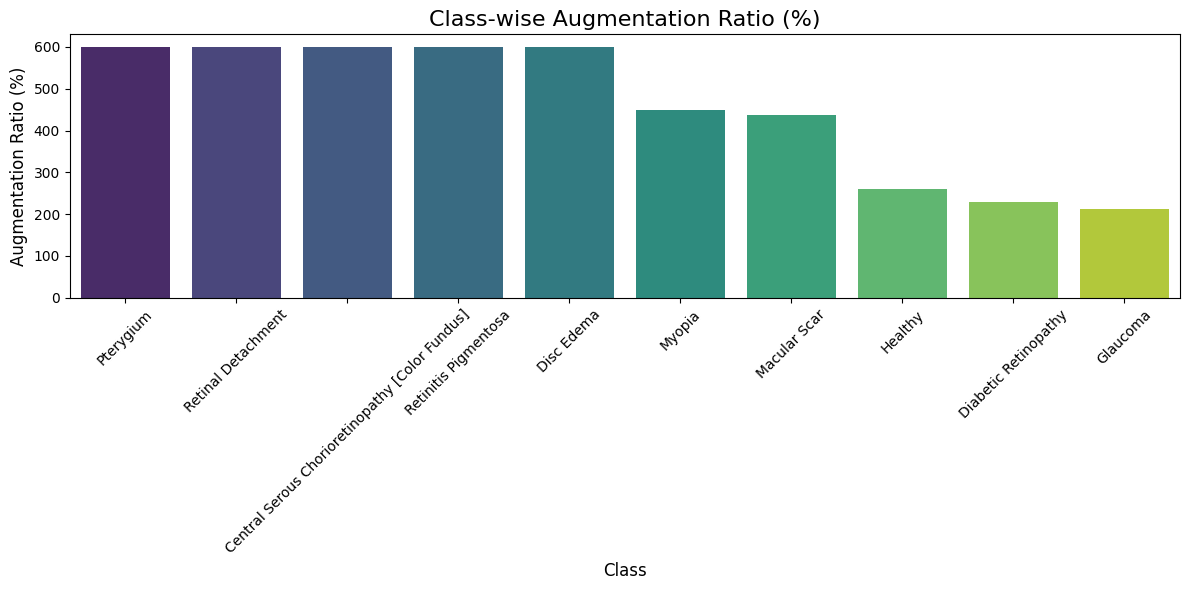

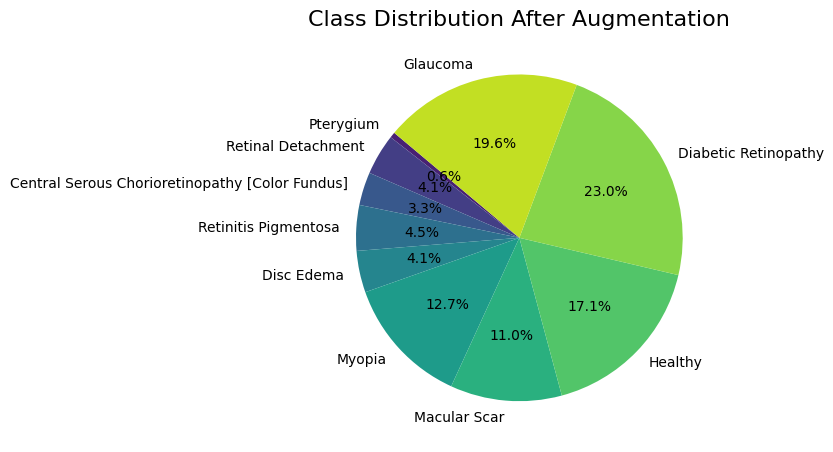

In [15]:
# Ï¶ùÍ∞ï ÎπÑÏú® Î∂ÑÏÑù ÏΩîÎìú (Ïù¥Ï†Ñ ÏΩîÎìú Ìè¨Ìï®)
def plot_augmentation_analysis(df_ratio):
    # ÎßâÎåÄ Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Class', y='Aug_Ratio(%)', data=df_ratio, palette='viridis')
    plt.title("Class-wise Augmentation Ratio (%)", fontsize=16)
    plt.xlabel("Class", fontsize=12)
    plt.ylabel("Augmentation Ratio (%)", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("/content/drive/MyDrive/Eye Disease Image Dataset/results/EDA_image/Class-wise Augmentation Ratio.png", dpi=300)
    plt.show()

    # ÏõêÌòï Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî (Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÎπÑÏú®)
    total_counts = df_ratio['Total'].sum()
    sizes = df_ratio['Total']
    labels = df_ratio['Class']

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(labels)))
    plt.title("Class Distribution After Augmentation", fontsize=16)
    plt.tight_layout()
    plt.savefig("/content/drive/MyDrive/Eye Disease Image Dataset/results/EDA_image/Class Distribution After Augmentation.png", dpi=300)
    plt.show()

# ÏãúÍ∞ÅÌôî Ìï®Ïàò Ïã§Ìñâ
plot_augmentation_analysis(df_ratio)

# üîç ÏõêÎ≥∏ ÌÅ¥ÎûòÏä§Î≥Ñ Ïù¥ÎØ∏ÏßÄ Í∞úÏàò ÏãúÍ∞ÅÌôî

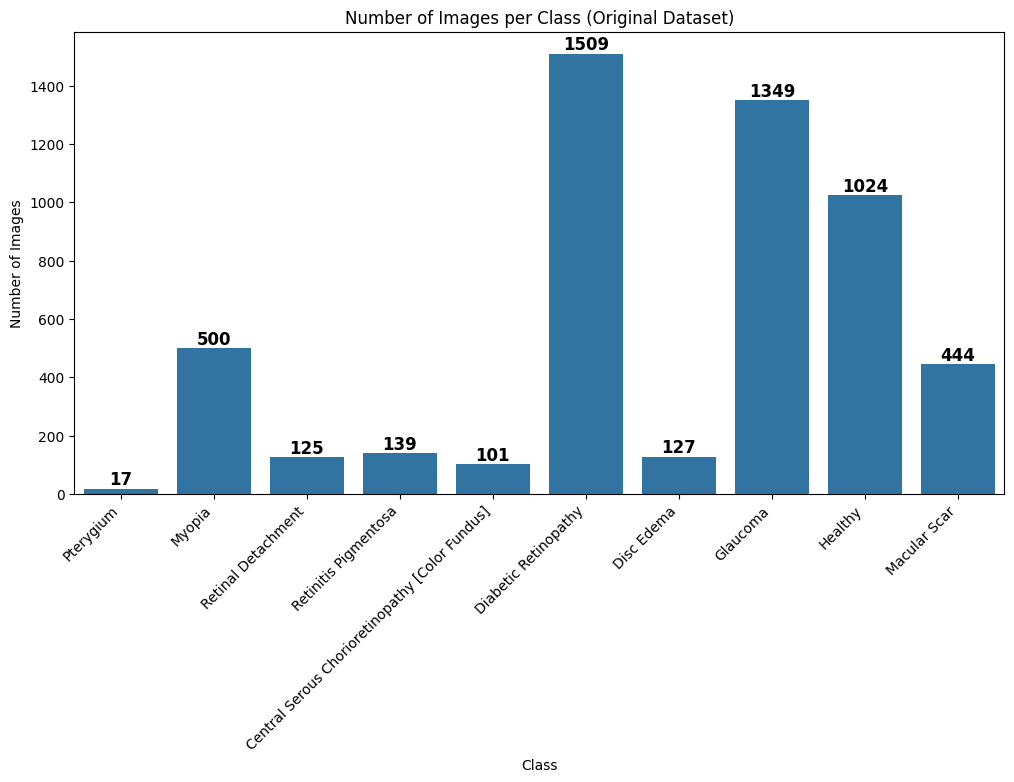

In [16]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=list(original_counts.keys()), y=list(original_counts.values()))

# ÎßâÎåÄ ÏúÑÏóê Ïà´Ïûê ÌëúÏãú (ÏúÑÏπò Ï°∞Ï†ï)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),  # ÏúÑÏπò: ÎßâÎåÄÏùò Ï§ëÏïô ÏÉÅÎã®
                ha='center', va='bottom',  # Ï§ëÏïô Ï†ïÎ†¨
                fontsize=12, color='black', fontweight='bold')  # Í∏ÄÏûê Ïä§ÌÉÄÏùº

plt.xticks(rotation=45, ha='right')
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class (Original Dataset)")
plt.savefig("/content/drive/MyDrive/Eye Disease Image Dataset/results/EDA_image/Original_class_count.png", dpi=300)
plt.show()

 ÏõêÎ≥∏ ÌÅ¥ÎûòÏä§Î≥Ñ Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï Î∂ÑÏÑù (ÎπÑÏú® ÎπÑÍµê)

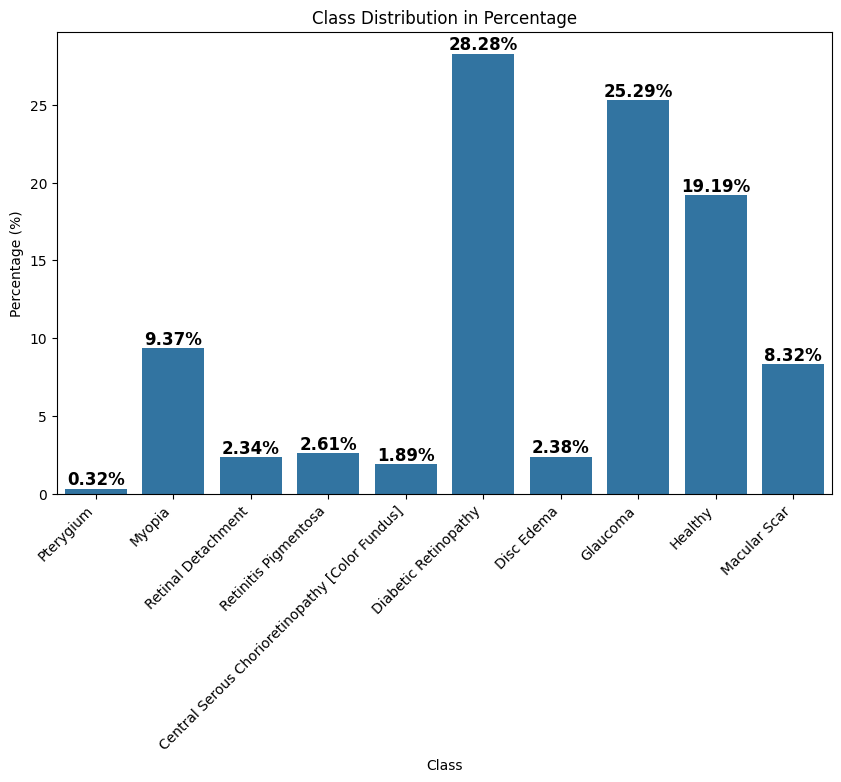

In [17]:
# ÌÅ¥ÎûòÏä§Î≥Ñ Ïù¥ÎØ∏ÏßÄ Í∞úÏàò ÎπÑÏú® Î∂ÑÏÑù
plt.figure(figsize=(10, 6))
class_ratios = {cls: count / sum(original_counts.values()) * 100 for cls, count in original_counts.items()}

ax = sns.barplot(x=list(class_ratios.keys()), y=list(class_ratios.values()))
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Class")
plt.ylabel("Percentage (%)")
plt.title("Class Distribution in Percentage")
plt.savefig("/content/drive/MyDrive/Eye Disease Image Dataset/results/EDA_image/Original_class_ratios.png", dpi=300)

plt.show()

# üîç ÏõêÎ≥∏ + Ï¶ùÍ∞ï ÌÅ¥ÎûòÏä§Î≥Ñ Ïù¥ÎØ∏ÏßÄ Í∞úÏàò ÏãúÍ∞ÅÌôî

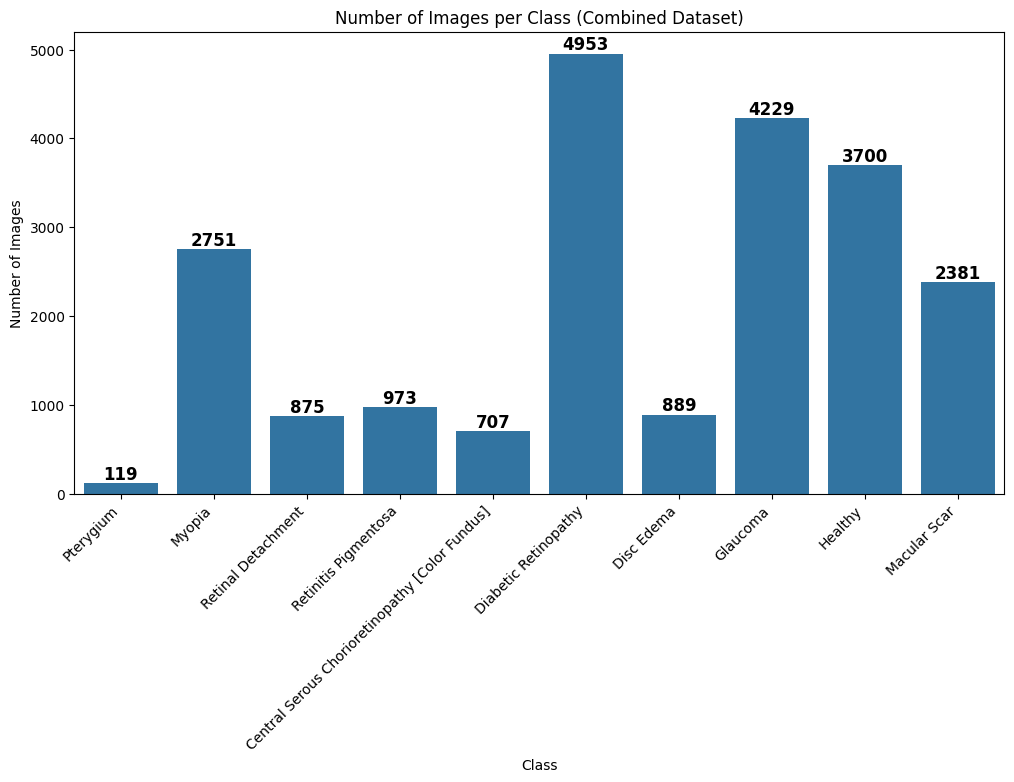

In [18]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=list(Combined_counts.keys()), y=list(Combined_counts.values()))

# ÎßâÎåÄ ÏúÑÏóê Ïà´Ïûê ÌëúÏãú (ÏúÑÏπò Ï°∞Ï†ï)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),  # ÏúÑÏπò: ÎßâÎåÄÏùò Ï§ëÏïô ÏÉÅÎã®
                ha='center', va='bottom',  # Ï§ëÏïô Ï†ïÎ†¨
                fontsize=12, color='black', fontweight='bold')  # Í∏ÄÏûê Ïä§ÌÉÄÏùº

plt.xticks(rotation=45, ha='right')
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class (Combined Dataset)")
plt.savefig("/content/drive/MyDrive/Eye Disease Image Dataset/results/EDA_image/class_count.png", dpi=300)
plt.show()

ÏõêÎ≥∏ + Ï¶ùÍ∞ï ÌÅ¥ÎûòÏä§Î≥Ñ Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï Î∂ÑÏÑù (ÎπÑÏú® ÎπÑÍµê)

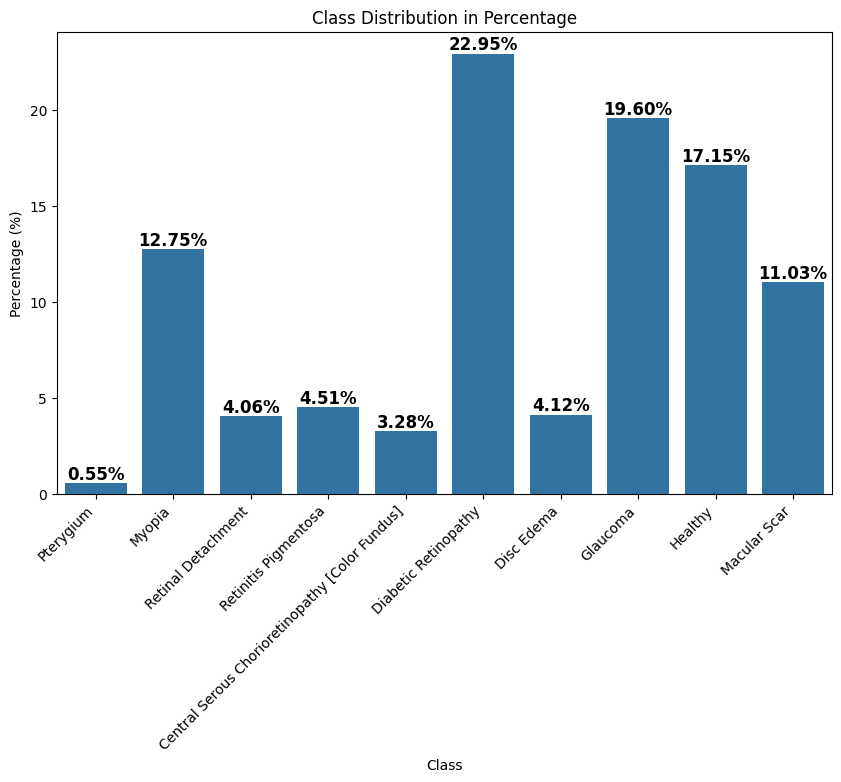

In [19]:
# ÌÅ¥ÎûòÏä§Î≥Ñ Ïù¥ÎØ∏ÏßÄ Í∞úÏàò ÎπÑÏú® Î∂ÑÏÑù
plt.figure(figsize=(10, 6))
class_ratios = {cls: count / sum(Combined_counts.values()) * 100 for cls, count in Combined_counts.items()}

ax = sns.barplot(x=list(class_ratios.keys()), y=list(class_ratios.values()))
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Class")
plt.ylabel("Percentage (%)")
plt.title("Class Distribution in Percentage")
plt.savefig("/content/drive/MyDrive/Eye Disease Image Dataset/results/EDA_image/class_ratios.png", dpi=300)

plt.show()

Ïù¥ÎØ∏ÏßÄ Î∞ùÍ∏∞ Î∂ÑÏÑù (ÌäπÏ†ï ÌÅ¥ÎûòÏä§ÏóêÏÑú Ïñ¥Îë°Í±∞ÎÇò Î∞ùÏùÄ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÎßéÏùÄÏßÄ ÌôïÏù∏)

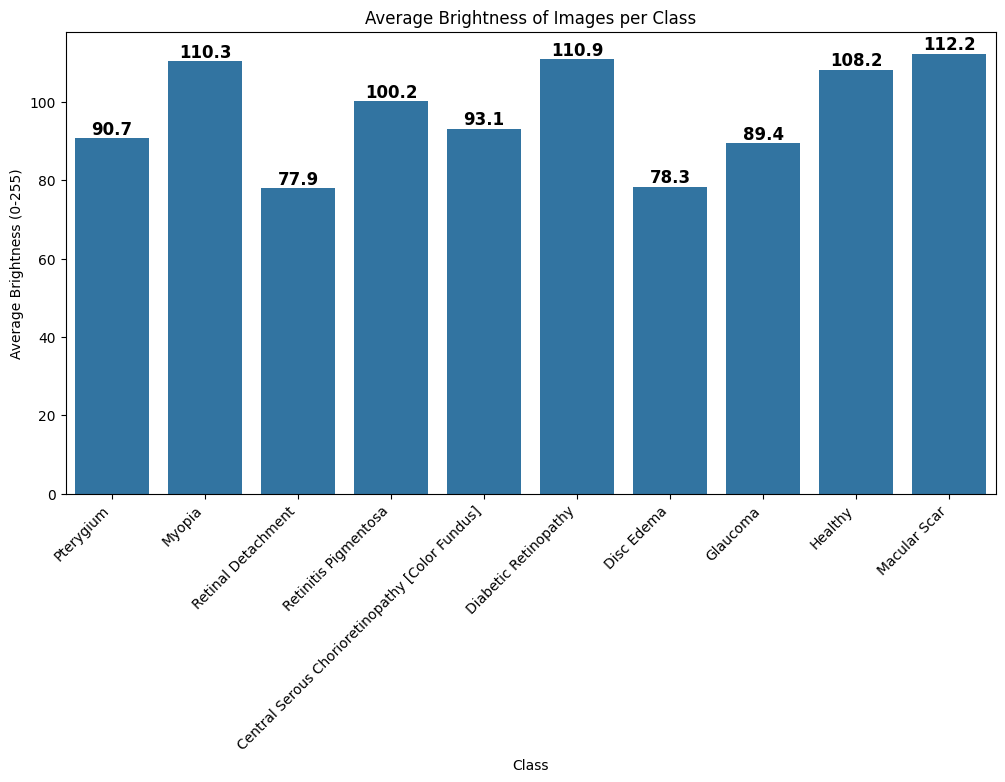

In [20]:
# ÌÅ¥ÎûòÏä§Î≥Ñ ÌèâÍ∑† Î∞ùÍ∏∞ Î∂ÑÏÑù
brightness_values = {}
for class_name in Combined_counts.keys():
    class_path = os.path.join(Combined_path, class_name)
    sample_images = os.listdir(class_path)[:5]  # ÌÅ¥ÎûòÏä§Î≥Ñ ÏÉòÌîåÎßÅ

    brightness_list = []
    for img_file in sample_images:
        img_path = os.path.join(class_path, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # ÌùëÎ∞± Î≥ÄÌôò
        brightness_list.append(np.mean(img))

    brightness_values[class_name] = np.mean(brightness_list)

# Î∞ùÍ∏∞ ÎπÑÍµê Í∑∏ÎûòÌîÑ
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=list(brightness_values.keys()), y=list(brightness_values.values()))
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Class")
plt.ylabel("Average Brightness (0-255)")
plt.title("Average Brightness of Images per Class")
plt.savefig("/content/drive/MyDrive/Eye Disease Image Dataset/results/EDA_image/class_brightness.png", dpi=300)
plt.show()

Ïù¥ÎØ∏ÏßÄ ÎåÄÎπÑ(Contrast) Î∂ÑÏÑù

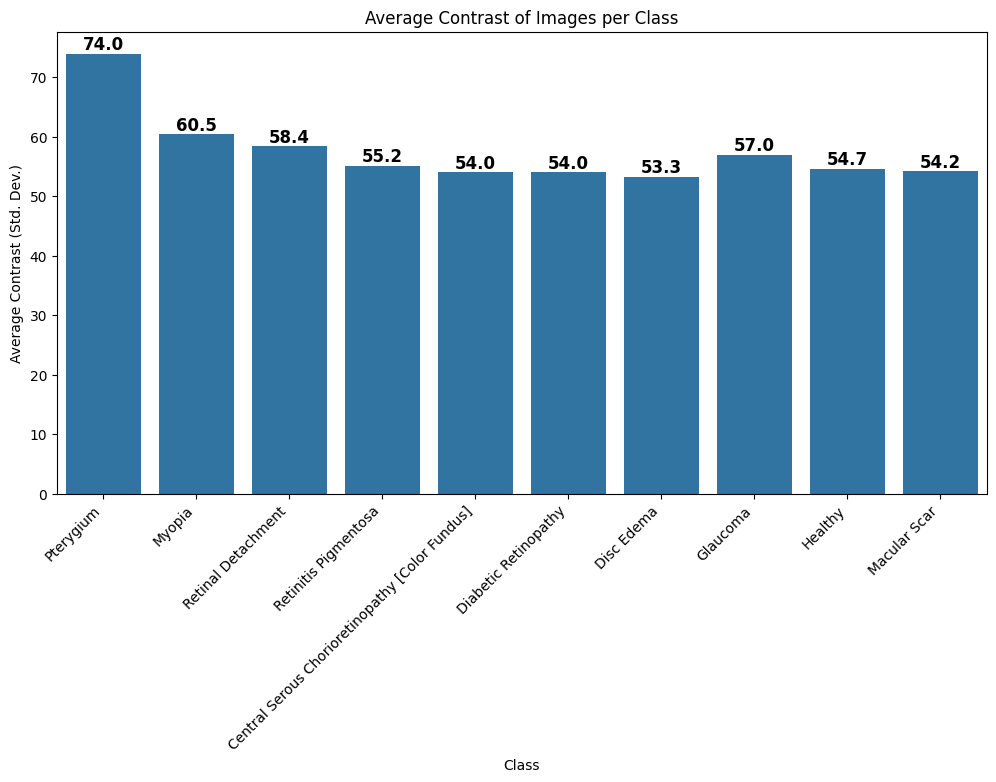

In [21]:
def calculate_contrast(image):
    return np.std(image)  # ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä ÌÅ¥ÏàòÎ°ù ÎåÄÎπÑ(Contrast)Í∞Ä ÌÅº

# ÌÅ¥ÎûòÏä§Î≥Ñ ÌèâÍ∑† ÎåÄÎπÑ Î∂ÑÏÑù
contrast_values = {}
for class_name in Combined_counts.keys():
    class_path = os.path.join(Combined_path, class_name)
    sample_images = os.listdir(class_path)[:5]  # ÌÅ¥ÎûòÏä§Î≥Ñ ÏÉòÌîåÎßÅ

    contrast_list = []
    for img_file in sample_images:
        img_path = os.path.join(class_path, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # ÌùëÎ∞± Î≥ÄÌôò
        contrast_list.append(calculate_contrast(img))

    contrast_values[class_name] = np.mean(contrast_list)

# ÎåÄÎπÑ ÎπÑÍµê Í∑∏ÎûòÌîÑ
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=list(contrast_values.keys()), y=list(contrast_values.values()))
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Class")
plt.ylabel("Average Contrast (Std. Dev.)")
plt.title("Average Contrast of Images per Class")
plt.savefig("/content/drive/MyDrive/Eye Disease Image Dataset/results/EDA_image/class_calculate_contrast.png", dpi=300)
plt.show()

Îç∞Ïù¥ÌÑ∞ Ï§ëÎ≥µ Í≤ÄÏÇ¨ (Duplicate Image Detection)

In [23]:
import os
import hashlib
from collections import defaultdict

def get_image_hash(image_path):
    """Ïù¥ÎØ∏ÏßÄÏùò Ìï¥Ïãú(SHA-256) Í∞íÏùÑ Í≥ÑÏÇ∞ÌïòÎäî Ìï®Ïàò"""
    with open(image_path, "rb") as f:
        return hashlib.sha256(f.read()).hexdigest()

# Ï§ëÎ≥µ Ïù¥ÎØ∏ÏßÄ ÌÉêÏÉâ Ìï®Ïàò
def find_duplicates(data_path):
    hashes = {}
    duplicates = defaultdict(list)  # ÌÅ¥ÎûòÏä§Î≥Ñ Ï§ëÎ≥µ Ïù¥ÎØ∏ÏßÄ Í∏∞Î°ù

    for class_name in os.listdir(data_path):
        class_path = os.path.join(data_path, class_name)
        if not os.path.isdir(class_path):
            continue  # ÌÅ¥ÎûòÏä§ Ìè¥ÎçîÍ∞Ä ÏïÑÎãê Í≤ΩÏö∞ Í±¥ÎÑàÎõ∞Í∏∞

        all_images = os.listdir(class_path)

        for img_file in all_images:
            img_path = os.path.join(class_path, img_file)
            try:
                img_hash = get_image_hash(img_path)

                if img_hash in hashes:
                    duplicates[class_name].append(img_path)  # ÌÅ¥ÎûòÏä§Î≥ÑÎ°ú Ï§ëÎ≥µ Í∏∞Î°ù
                else:
                    hashes[img_hash] = img_path

            except Exception as e:
                print(f"‚ùå Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ Ïò§Î•ò: {img_path} - {e}")

    return duplicates


# Ï§ëÎ≥µ Ïù¥ÎØ∏ÏßÄ ÌÉêÏÉâ Ïã§Ìñâ
duplicates = find_duplicates(Combined_path)

# Ï§ëÎ≥µ Ïù¥ÎØ∏ÏßÄ Í∞úÏàò Ï∂úÎ†•
total_duplicates = sum(len(paths) for paths in duplicates.values())
print(f"üìå Î∞úÍ≤¨Îêú Ï§ëÎ≥µ Ïù¥ÎØ∏ÏßÄ Ï¥ù Í∞úÏàò: {total_duplicates}")

# ÌÅ¥ÎûòÏä§Î≥Ñ Ï§ëÎ≥µ Ïù¥ÎØ∏ÏßÄ Í∞úÏàò Ï∂úÎ†•
for class_name, paths in duplicates.items():
    print(f"üìÇ {class_name}: {len(paths)} Ï§ëÎ≥µ Ïù¥ÎØ∏ÏßÄ Î∞úÍ≤¨")


üìå Î∞úÍ≤¨Îêú Ï§ëÎ≥µ Ïù¥ÎØ∏ÏßÄ Ï¥ù Í∞úÏàò: 1395
üìÇ Myopia: 7 Ï§ëÎ≥µ Ïù¥ÎØ∏ÏßÄ Î∞úÍ≤¨
üìÇ Retinal Detachment: 7 Ï§ëÎ≥µ Ïù¥ÎØ∏ÏßÄ Î∞úÍ≤¨
üìÇ Retinitis Pigmentosa: 24 Ï§ëÎ≥µ Ïù¥ÎØ∏ÏßÄ Î∞úÍ≤¨
üìÇ Diabetic Retinopathy: 46 Ï§ëÎ≥µ Ïù¥ÎØ∏ÏßÄ Î∞úÍ≤¨
üìÇ Disc Edema: 60 Ï§ëÎ≥µ Ïù¥ÎØ∏ÏßÄ Î∞úÍ≤¨
üìÇ Glaucoma: 420 Ï§ëÎ≥µ Ïù¥ÎØ∏ÏßÄ Î∞úÍ≤¨
üìÇ Healthy: 477 Ï§ëÎ≥µ Ïù¥ÎØ∏ÏßÄ Î∞úÍ≤¨
üìÇ Macular Scar: 354 Ï§ëÎ≥µ Ïù¥ÎØ∏ÏßÄ Î∞úÍ≤¨


In [24]:
total_images = sum(Combined_counts.values())  # Ï†ÑÏ≤¥ Ïù¥ÎØ∏ÏßÄ Í∞úÏàò
duplicate_ratio = (1395 / total_images) * 100
print(f"üìå Ï§ëÎ≥µ Ïù¥ÎØ∏ÏßÄ ÎπÑÏú®: {duplicate_ratio:.2f}%")

üìå Ï§ëÎ≥µ Ïù¥ÎØ∏ÏßÄ ÎπÑÏú®: 6.47%


Ïù¥ÎØ∏ÏßÄ ÏÉâÏÉÅ Î∂ÑÏÑù (RGB Ï±ÑÎÑê Î∂ÑÌè¨)

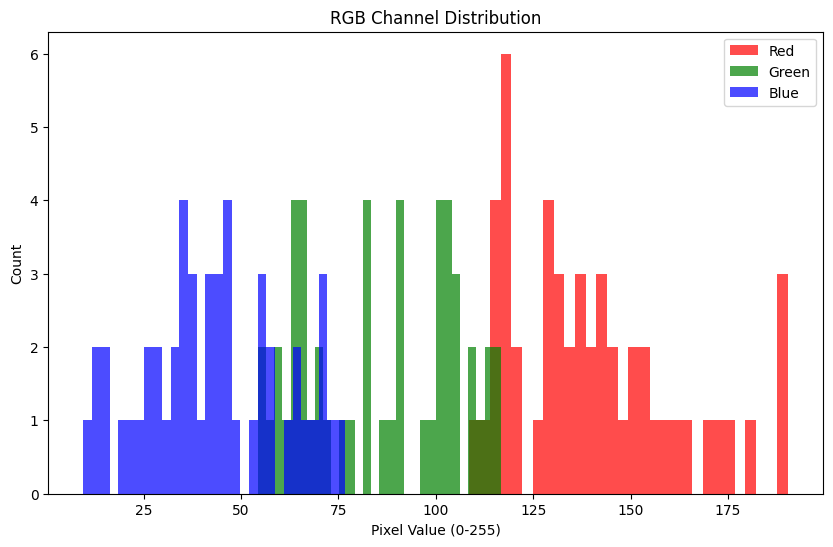

In [25]:
# RGB ÏÉâÏÉÅ Î∂ÑÌè¨ Î∂ÑÏÑù
r_values, g_values, b_values = [], [], []

for class_name in Combined_counts.keys():
    class_path = os.path.join(Combined_path, class_name)
    sample_images = os.listdir(class_path)[:5]  # Í∞Å ÌÅ¥ÎûòÏä§ÏóêÏÑú ÏÉòÌîå Ïù¥ÎØ∏ÏßÄ ÌôïÏù∏

    for img_file in sample_images:
        img_path = os.path.join(class_path, img_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR ‚Üí RGB Î≥ÄÌôò

        r_values.append(np.mean(img[:, :, 0]))  # Red Ï±ÑÎÑê ÌèâÍ∑†Í∞í
        g_values.append(np.mean(img[:, :, 1]))  # Green Ï±ÑÎÑê ÌèâÍ∑†Í∞í
        b_values.append(np.mean(img[:, :, 2]))  # Blue Ï±ÑÎÑê ÌèâÍ∑†Í∞í

# RGB Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.hist(r_values, bins=30, alpha=0.7, label="Red", color='red')
plt.hist(g_values, bins=30, alpha=0.7, label="Green", color='green')
plt.hist(b_values, bins=30, alpha=0.7, label="Blue", color='blue')
plt.xlabel("Pixel Value (0-255)")
plt.ylabel("Count")
plt.legend()
plt.title("RGB Channel Distribution")
plt.savefig("/content/drive/MyDrive/Eye Disease Image Dataset/results/EDA_image/class_RGB.png", dpi=300)
plt.show()

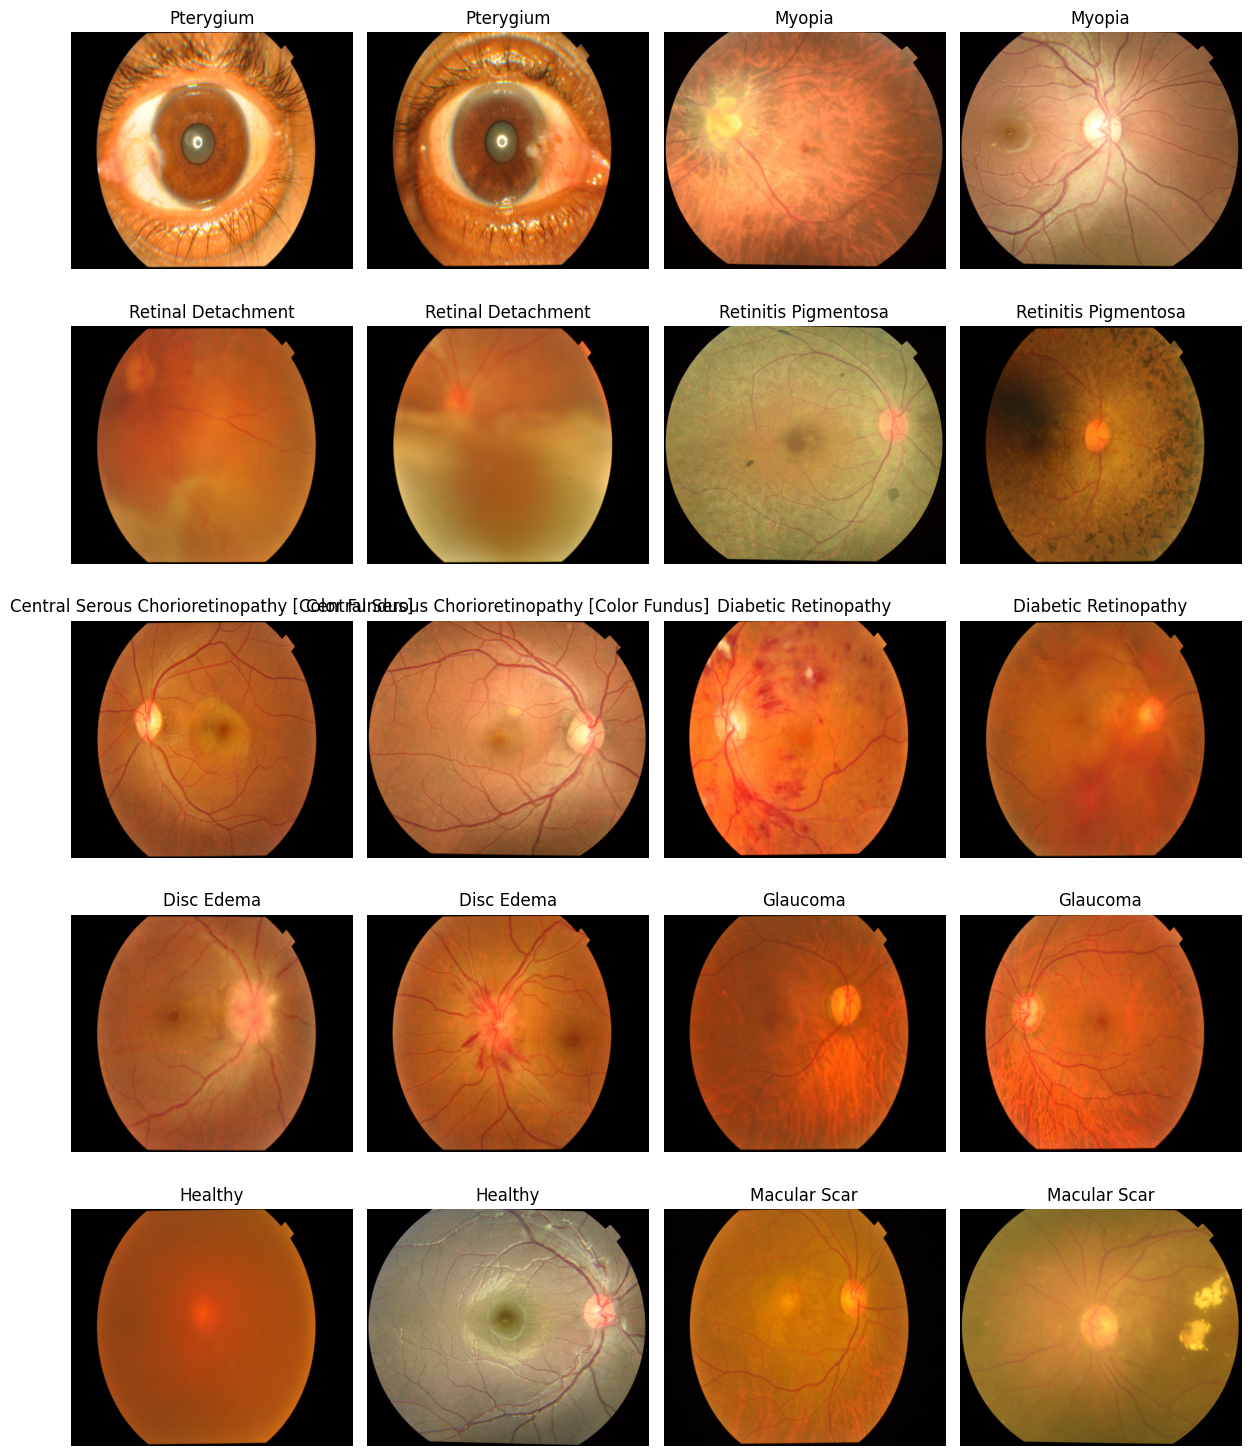

In [28]:
# ÏÑ§Ï†ï Í∞í
num_samples = 2  # ÌÅ¥ÎûòÏä§Î≥Ñ ÏÉòÌîå Í∞úÏàò
num_rows = 5  # Ï∂úÎ†•Ìï† Ìñâ Ïàò
num_cols = 4  # Ï∂úÎ†•Ìï† Ïó¥ Ïàò


class_names = os.listdir(Original_path)
sampled_images = []

# Í∞Å ÌÅ¥ÎûòÏä§ÏóêÏÑú ÏÉòÌîå Ïù¥ÎØ∏ÏßÄ Ï∂îÏ∂ú (ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Îßå ÎåÄÏÉÅÏúºÎ°ú Ìï®)
for class_name in class_names:
    class_path = os.path.join(Original_path, class_name)
    image_files = os.listdir(class_path)
    if len(image_files) < num_samples:
        sampled_images.extend([(class_name, os.path.join(class_path, img)) for img in image_files])
    else:
        sampled_images.extend([(class_name, os.path.join(class_path, img)) for img in random.sample(image_files, num_samples)])

# Ï†ÑÏ≤¥ Ïù¥ÎØ∏ÏßÄ Ïàò (num_rows * num_cols)Î•º Ï¥àÍ≥ºÌïòÏßÄ ÏïäÎèÑÎ°ù Ï°∞Ï†ï
max_images = num_rows * num_cols
sampled_images = sampled_images[:max_images]

# Í∑∏Î¶¨ÎìúÎ°ú Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 3, num_rows * 3))
axes = axes.flatten()

for ax, (class_name, img_path) in zip(axes, sampled_images):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(class_name, fontsize=12)

# ÎÇ®Îäî subplot ÎπÑÏö∞Í∏∞
for i in range(len(sampled_images), len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Eye Disease Image Dataset/results/EDA_image/class_image.png", dpi=300, bbox_inches='tight')
plt.show()